In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 엑셀 데이터 읽기
file_path = r'C:\Users\ohj\Desktop\PBS\environment\판넬_데이터.xlsx'
df = pd.read_excel(file_path)

# 타입별 데이터 준비
grouped = df.groupby('타입')
type_stats = []

for name, group in grouped:
    stats_summary = group.describe().loc[['mean', 'std']].stack().to_frame().T
    stats_summary.index = [name]
    type_stats.append(stats_summary)

type_stats_df = pd.concat(type_stats)

# NaN 값을 각 피처의 평균값으로 대체
type_stats_df = type_stats_df.fillna(type_stats_df.mean())

# 데이터 스케일링 (정규화)
scaler = StandardScaler()
type_stats_scaled = scaler.fit_transform(type_stats_df)

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(type_stats_scaled)

# 각 타입에 할당된 클러스터 출력
type_stats_df['Cluster'] = clusters
print(type_stats_df)

# 각 클러스터에 속한 타입 확인
for cluster in sorted(type_stats_df['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(type_stats_df[type_stats_df['Cluster'] == cluster].index.tolist())


            mean                                                         \
           크레인배재       주판판계       전면SAW TurnOver       후면SAW       NC마킹   
TP_1    8.666667  17.666667   26.000000     20.0   26.000000  28.333333   
TP_10  12.867882  27.583144   41.267654     20.0   41.267654  35.780182   
TP_11  10.916667  23.229167   32.479167     20.0   32.479167  33.333333   
TP_12  17.400000  35.000000   56.600000     20.0   56.600000  39.000000   
TP_13  13.000000  25.000000   50.000000     20.0   50.000000  65.000000   
TP_14  13.000000  28.125000   47.125000     20.0   47.125000  45.000000   
TP_15   8.000000  15.000000   15.000000     20.0   15.000000  20.000000   
TP_16   9.666667  16.666667   21.000000     20.0   21.000000  21.666667   
TP_17   8.000000  15.000000   15.000000     20.0   15.000000  25.000000   
TP_18   8.000000  15.000000   15.000000     20.0   15.000000  25.000000   
TP_19   8.000000  12.000000   20.000000     20.0   20.000000  20.000000   
TP_2   16.025974  35.5974

c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3]:
import pandas as pd
from scipy import stats

# 엑셀 데이터 읽기
file_path = r'C:\Users\ohj\Desktop\PBS\environment\판넬_데이터.xlsx'
df = pd.read_excel(file_path)

# 숫자형 열만 선택
numeric_df = df.select_dtypes(include=[float, int])

# 타입별 피처 통계 계산 (평균 및 표준편차)
type_stats = numeric_df.groupby(df['타입']).agg(['mean', 'std'])

# 주요 타입: 독립적으로 처리
major_types = ['TP_10', 'TP_2', 'TP_11']

for major_type in major_types:
    print(f"\nProcessing {major_type}...")
    major_data = numeric_df[df['타입'] == major_type]
    for feature in major_data.columns:
        feature_data = major_data[feature].dropna()
        if len(feature_data) > 0:
            s, loc, sc = stats.lognorm.fit(feature_data, floc=0)
            print(f"{feature} - Shape: {s}, Scale: {sc}")

# 소규모 타입들: 그룹화 필요
minor_types = ['TP_15', 'TP_16', 'TP_18', 'TP_17', 'TP_22', 'TP_14', 'TP_3', 'TP_7', 'TP_6',
               'TP_24', 'TP_1', 'TP_12', 'TP_21', 'TP_13', 'TP_19', 'TP_20', 'TP_9', 'TP_5', 'TP_8', 'TP_4', 'TP_23']

# 소규모 타입들 그룹화 및 파라미터 추정
# 평균과 표준편차가 유사한 타입들끼리 묶는 것을 고려



Processing TP_10...
크레인배재 - Shape: 0.3008964136374224, Scale: 12.264336676450062
주판판계 - Shape: 0.3807944895447865, Scale: 25.6570752692085
전면SAW - Shape: 0.44902231671373105, Scale: 37.269443251704054
TurnOver - Shape: 4.440892098500626e-16, Scale: 19.99999999999999
후면SAW - Shape: 0.44902231671373105, Scale: 37.269443251704054
NC마킹 - Shape: 0.28118616262141116, Scale: 34.417384460559866
절단 - Shape: 0.18159463980519291, Scale: 28.757611350521486
론지배재 - Shape: 0.34310754203690147, Scale: 52.556147891745276
론지용접 - Shape: 0.37366446568392, Scale: 47.268821504527594
론지수정 - Shape: 0.2464477549180288, Scale: 37.029374671356926

Processing TP_2...
크레인배재 - Shape: 0.38750773470995853, Scale: 14.753227536132012
주판판계 - Shape: 0.4995272758586531, Scale: 30.778448125076803
전면SAW - Shape: 0.5201488088587021, Scale: 45.52538572017582
TurnOver - Shape: 4.440892098500626e-16, Scale: 19.99999999999999
후면SAW - Shape: 0.5201488088587021, Scale: 45.52538572017582
NC마킹 - Shape: 0.1688245493171346, Scale: 42

In [4]:
# 데이터에서 '타입' 열에 어떤 값들이 있는지 확인
unique_types = df['타입'].unique()
unique_types

array(['TP_10', 'TP_2', 'TP_11', 'TP_15', 'TP_16', 'TP_18', 'TP_17',
       'TP_22', 'TP_14', 'TP_3', 'TP_7', 'TP_6', 'TP_24', 'TP_1', 'TP_12',
       'TP_21', 'TP_13', 'TP_19', 'TP_20', 'TP_9', 'TP_5', 'TP_8', 'TP_4',
       'TP_23'], dtype=object)

In [5]:
# 타입별로 데이터 분리
'''
['TP_10', 'TP_2', 'TP_11', 'TP_15', 'TP_16', 'TP_18', 'TP_17',
'TP_22', 'TP_14', 'TP_3', 'TP_7', 'TP_6', 'TP_24', 'TP_1', 'TP_12',
'TP_21', 'TP_13', 'TP_19', 'TP_20', 'TP_9', 'TP_5', 'TP_8', 'TP_4','TP_23']
'''
tp_10 = df[df['타입'] == 'TP_10']
tp_2 = df[df['타입'] == 'TP_2']
tp_11 = df[df['타입'] == 'TP_11']
tp_15 = df[df['타입'] == 'TP_15']
tp_16 = df[df['타입'] == 'TP_16']
tp_18 = df[df['타입'] == 'TP_18']
tp_17 = df[df['타입'] == 'TP_17']
tp_22 = df[df['타입'] == 'TP_22']
tp_14 = df[df['타입'] == 'TP_14']
tp_3 = df[df['타입'] == 'TP_3']
tp_7 = df[df['타입'] == 'TP_7']
tp_6 = df[df['타입'] == 'TP_6']
tp_24 = df[df['타입'] == 'TP_24']
tp_1 = df[df['타입'] == 'TP_1']
tp_12 = df[df['타입'] == 'TP_12']
tp_21 = df[df['타입'] == 'TP_21']
tp_13 = df[df['타입'] == 'TP_13']
tp_19 = df[df['타입'] == 'TP_19']
tp_20 = df[df['타입'] == 'TP_20']
tp_9 = df[df['타입'] == 'TP_9']
tp_5 = df[df['타입'] == 'TP_5']
tp_8 = df[df['타입'] == 'TP_8']
tp_4 = df[df['타입'] == 'TP_4']
tp_23 = df[df['타입'] == 'TP_23']


In [77]:
# 기본 통계 정보 확인 (평균, 표준편차 등)
tp_14_stats = tp_14.describe()

print("TP_14 Stats:\n", tp_14_stats)


TP_14 Stats:
           크레인배재       주판판계      전면SAW  TurnOver      후면SAW  NC마킹        절단  \
count   8.00000   8.000000   8.000000       8.0   8.000000   8.0   8.00000   
mean   13.00000  28.125000  47.125000      20.0  47.125000  45.0  41.25000   
std     2.13809   5.303301   1.642081       0.0   1.642081   0.0   2.31455   
min    11.00000  25.000000  45.000000      20.0  45.000000  45.0  40.00000   
25%    11.00000  25.000000  46.500000      20.0  46.500000  45.0  40.00000   
50%    13.00000  25.000000  47.000000      20.0  47.000000  45.0  40.00000   
75%    15.00000  30.000000  48.000000      20.0  48.000000  45.0  41.25000   
max    15.00000  40.000000  50.000000      20.0  50.000000  45.0  45.00000   

       론지배재  론지용접          론지수정  
count   8.0   8.0  8.000000e+00  
mean   41.5  35.6  4.290000e+01  
std     0.0   0.0  7.596021e-15  
min    41.5  35.6  4.290000e+01  
25%    41.5  35.6  4.290000e+01  
50%    41.5  35.6  4.290000e+01  
75%    41.5  35.6  4.290000e+01  
max    41.5

In [7]:
# 타입별 데이터 개수 계산
type_counts = df['타입'].value_counts()

# 타입별 데이터 개수 출력
type_counts


타입
TP_10    878
TP_2      77
TP_11     48
TP_14      8
TP_9       6
TP_12      5
TP_24      4
TP_4       3
TP_8       3
TP_1       3
TP_16      3
TP_22      2
TP_13      2
TP_15      2
TP_20      2
TP_23      2
TP_17      2
TP_18      2
TP_7       2
TP_3       2
TP_19      1
TP_6       1
TP_5       1
TP_21      1
Name: count, dtype: int64

In [21]:
# 데이터 부족한 TP_19, TP_21, TP_5,TP_6 제외하고 계산

# 엑셀 데이터 다시 읽기
file_path = r'C:\Users\ohj\Desktop\PBS\environment\판넬_데이터.xlsx'
df = pd.read_excel(file_path)

# 숫자형 데이터만 선택 (타입, 호선번호, 블록명 등 비숫자형 데이터 제외)
numeric_df = df.select_dtypes(include=[float, int])

# '타입'별 피처별 평균 및 표준편차 계산
stats_by_type = numeric_df.groupby(df['타입']).agg(['mean', 'std', 'count'])

# TP_10을 기준으로 설정
first_type = 'TP_10'
print(f"Comparison base type: {first_type}")

# NaN이 발생한 타입들
nan_types = ['TP_19', 'TP_21', 'TP_5', 'TP_6']

# 타입별 평균 및 표준편차 차이를 저장할 리스트 초기화
comparison_list = []

# TP_10을 기준으로 나머지 타입들과 비교 (NaN이 발생한 타입 제외)
for col in stats_by_type.columns.levels[0]:  # 각 피처에 대해
    for t in stats_by_type.index:  # TP_10과 나머지 타입 간 비교
        if t != first_type and t not in nan_types:
            mean_diff = stats_by_type.loc[t, (col, 'mean')] - stats_by_type.loc[first_type, (col, 'mean')]
            std_diff = stats_by_type.loc[t, (col, 'std')] - stats_by_type.loc[first_type, (col, 'std')]
            comparison_list.append({
                'Type': t,
                'Feature': col,
                'Std Difference': std_diff
            })

# 리스트를 DataFrame으로 변환
type_comparison = pd.DataFrame(comparison_list)

# 타입별 차이 강조 표 출력
styled_comparison = type_comparison.pivot(index='Feature', columns='Type', values=[ 'Std Difference']).style.format("{:.2f}")
display(styled_comparison)

Comparison base type: TP_10


In [94]:
# 각 피처의 평균 및 표준편차 계산
tp_10_stats = tp_10.describe().loc[['mean', 'std']]
tp_2_stats = tp_2.describe().loc[['mean', 'std']]

# 평균 및 표준편차 차이 계산
mean_diff = tp_10_stats.loc['mean'] - tp_2_stats.loc['mean']
std_diff = tp_10_stats.loc['std'] - tp_2_stats.loc['std']

# 차이 강조 표 생성
comparison_df = pd.DataFrame({
    'TP_5 Mean': tp_10_stats.loc['mean'],
    'TP_2 Mean': tp_2_stats.loc['mean'],
    'Mean Difference': mean_diff,
    'TP_5 Std': tp_10_stats.loc['std'],
    'TP_2 Std': tp_2_stats.loc['std'],
    'Std Difference': std_diff,   
})

# Pandas Styler 사용하여 출력 (스타일링)
styled_df = comparison_df.style.format("{:.2f}")  # 소수점 2자리까지 포맷팅
display(styled_df)

,TP_5 Mean,TP_2 Mean,Mean Difference,TP_5 Std,TP_2 Std,Std Difference
크레인배재,12.87,16.03,-3.16,4.33,7.36,-3.03
주판판계,27.58,35.60,-8.01,10.96,23.44,-12.48
전면SAW,41.27,51.73,-10.46,19.42,25.45,-6.03
TurnOver,20.00,20.00,0.00,0.00,0.00,0.00
후면SAW,41.27,51.73,-10.46,19.42,25.45,-6.03
NC마킹,35.78,42.92,-7.14,10.06,5.64,4.42
절단,29.22,34.03,-4.81,5.10,30.93,-25.83
론지배재,55.62,77.00,-21.38,18.27,18.96,-0.69
론지용접,50.47,63.99,-13.52,17.56,19.79,-2.23
론지수정,38.00,36.57,1.44,7.61,7.22,0.39


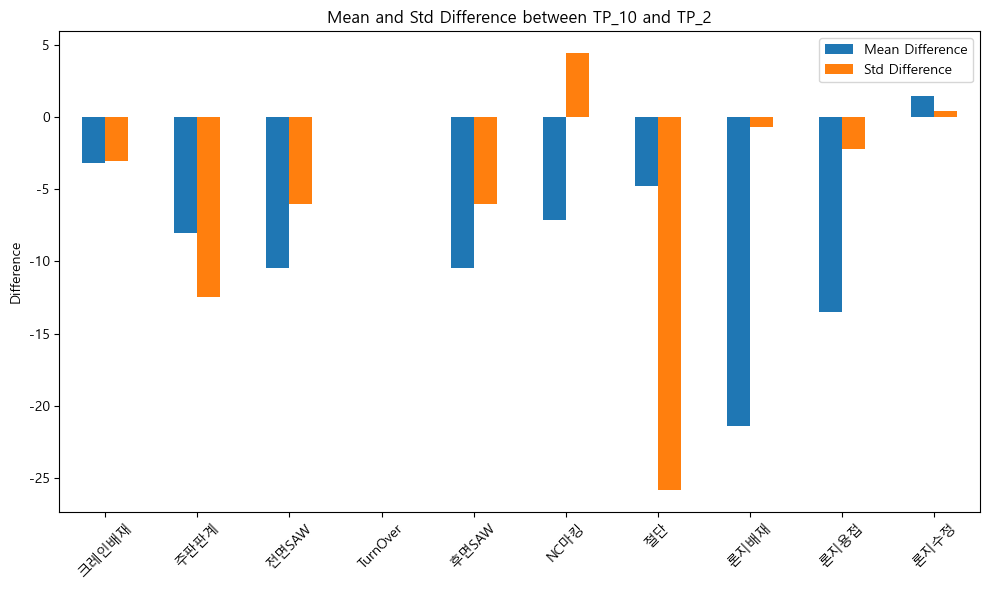

In [96]:
# 평균, 표준 편차 차이 막대 그래프

# 한글 폰트 설정 (Malgun Gothic 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'

# y축의 음수 표현 문제 해결을 위해, 유니코드 마이너스 기호 사용 설정
plt.rcParams['axes.unicode_minus'] = False

comparison_df[['Mean Difference', 'Std Difference']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Std Difference between TP_10 and TP_2')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# 평균 차이 막대 그래프
comparison_df[['Variance Difference']].plot(kind='bar', figsize=(10, 6))
plt.title('Variance Differences between TP_10 and TP_2')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Variance Difference'], dtype='object')] are in the [columns]"

In [ ]:
# 타입별 데이터 개수 계산
type_counts = df['타입'].value_counts()

# 타입별 데이터 개수 출력
type_counts


타입
TP_10    878
TP_2      77
TP_11     48
TP_14      8
TP_9       6
TP_12      5
TP_24      4
TP_4       3
TP_8       3
TP_1       3
TP_16      3
TP_22      2
TP_13      2
TP_15      2
TP_20      2
TP_23      2
TP_17      2
TP_18      2
TP_7       2
TP_3       2
TP_19      1
TP_6       1
TP_5       1
TP_21      1
Name: count, dtype: int64

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# 가정: 데이터프레임 'data'에 각 타입별 데이터가 이미 로드되어 있다고 가정
# 각 타입에 대한 데이터를 데이터프레임으로 로드한 후, 필요한 피쳐들을 지정합니다.

type_params = {}

# 타입별로 데이터프레임을 그룹화
for type_name, group_data in df.groupby('타입'):
    type_params[type_name] = {}
    shape_params = []
    scale_params = []
    
    # 각 피쳐에 대해 로그 정규분포 피팅
    for feature in ['크레인배재', '주판판계', '전면SAW', '후면SAW', 'NC마킹', '절단', '론지배재', '론지용접', '론지수정']:
        feature_data = group_data[feature].dropna()
        if len(feature_data) > 0:
            shape, loc, scale = stats.lognorm.fit(feature_data, floc=0)  # 피팅
            shape_params.append(shape)
            scale_params.append(scale)
        else:
            shape_params.append(0)
            scale_params.append(1)
    
    # 추정된 shape과 scale 저장
    type_params[type_name]['shape'] = shape_params
    type_params[type_name]['scale'] = scale_params

# 결과 출력
type_params


{'TP_1': {'shape': [0.10519087887488424,
   0.20149904097448812,
   0.053423654589025496,
   0.053423654589025496,
   0.3822761699704262,
   0.1911380849852132,
   0.40374488429505995,
   0.26654986713567685,
   0.011460121793685236],
  'scale': [8.617738760127533,
   17.296973419998494,
   25.962470509255517,
   25.962470509255517,
   26.20741394208896,
   22.894284851066633,
   41.24285765534027,
   44.31202006916335,
   45.06369941784275]},
 'TP_10': {'shape': [0.3008964136374224,
   0.3807944895447865,
   0.44902231671373105,
   0.44902231671373105,
   0.28118616262141116,
   0.18159463980519291,
   0.34310754203690147,
   0.37366446568392,
   0.2464477549180288],
  'scale': [12.264336676450062,
   25.6570752692085,
   37.269443251704054,
   37.269443251704054,
   34.417384460559866,
   28.757611350521486,
   52.556147891745276,
   47.268821504527594,
   37.029374671356926]},
 'TP_11': {'shape': [0.20051179534081123,
   0.34889092742836036,
   0.3052205603304983,
   0.3052205603304

In [13]:
# TP_9 데이터 확인
tp_9_data = df[df['타입'] == 'TP_9']

# 각 피처의 고유 값 확인
unique_values = tp_9_data.select_dtypes(include=[float, int]).nunique()
print(unique_values)

# NaN이 발생한 이유가 동일한 값 때문인지 확인
nan_reasons = tp_9_data.select_dtypes(include=[float, int]).isna().sum()
print(nan_reasons)


크레인배재       3
주판판계        3
전면SAW       2
TurnOver    1
후면SAW       2
NC마킹        3
절단          2
론지배재        1
론지용접        1
론지수정        1
dtype: int64
크레인배재       0
주판판계        0
전면SAW       0
TurnOver    0
후면SAW       0
NC마킹        0
절단          0
론지배재        0
론지용접        0
론지수정        0
dtype: int64


In [14]:
# 타입 목록
types = ['TP_10', 'TP_2', 'TP_11', 'TP_14', 'TP_9', 'TP_12', 'TP_24', 'TP_4', 'TP_8', 
         'TP_1', 'TP_16', 'TP_22', 'TP_13', 'TP_15', 'TP_20', 'TP_23', 'TP_17', 
         'TP_18', 'TP_7', 'TP_3', 'TP_19', 'TP_6', 'TP_5', 'TP_21']

# 스타일링된 상관계수 매트릭스를 저장할 딕셔너리
styled_corr_dict = {}

# 각 타입에 대해 상관계수 매트릭스 계산 및 스타일 적용
for tp in types:
    # 숫자형 데이터만 선택
    tp_numeric = df[df['타입'] == tp].select_dtypes(include=[float, int])
    
    # 상관계수 매트릭스 계산
    corr_matrix = tp_numeric.corr()
    
    # 스타일 적용
    styled_corr = corr_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}")
    
    # 딕셔너리에 저장
    styled_corr_dict[tp] = styled_corr

In [70]:
# TP_14 상관관계 표 출력
print("TP_14 Correlation Matrix")
display(styled_corr_dict['TP_24'])

TP_14 Correlation Matrix


,크레인배재,주판판계,전면SAW,TurnOver,후면SAW,NC마킹,절단,론지배재,론지용접,론지수정
크레인배재,1.00,0.99,-0.52,nan,-0.52,0.82,0.33,-0.97,-0.94,-0.94
주판판계,0.99,1.00,-0.43,nan,-0.43,0.76,0.25,-0.92,-0.87,-0.87
전면SAW,-0.52,-0.43,1.00,nan,1.00,-0.21,0.17,0.62,0.65,0.65
TurnOver,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
후면SAW,-0.52,-0.43,1.00,nan,1.00,-0.21,0.17,0.62,0.65,0.65
NC마킹,0.82,0.76,-0.21,nan,-0.21,1.00,0.82,-0.86,-0.87,-0.87
절단,0.33,0.25,0.17,nan,0.17,0.82,1.00,-0.44,-0.47,-0.47
론지배재,-0.97,-0.92,0.62,nan,0.62,-0.86,-0.44,1.00,1.00,1.00
론지용접,-0.94,-0.87,0.65,nan,0.65,-0.87,-0.47,1.00,1.00,1.00
론지수정,-0.94,-0.87,0.65,nan,0.65,-0.87,-0.47,1.00,1.00,1.00


## 최종 비교

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 읽기
generated_data = pd.read_excel('C:/Users/ohj/Desktop/PBS/environment/PBS_10_1060_2.xlsx')
original_data = pd.read_excel('C:/Users/ohj/Desktop/PBS/environment/판넬_데이터.xlsx')

def compare_distributions_by_type(original, generated, column, type_name):
    orig_type_data = original[original['타입'] == type_name]
    gen_type_data = generated[generated['타입'] == type_name]
    
    plt.figure(figsize=(12, 6))
    sns.histplot(orig_type_data[column], kde=True, color='blue', alpha=0.5, label='Original')
    sns.histplot(gen_type_data[column], kde=True, color='red', alpha=0.5, label='Generated')
    plt.title(f'Distribution Comparison: {column} (Type: {type_name})')
    plt.legend()
    plt.show()
    
    ks_statistic, p_value = stats.ks_2samp(orig_type_data[column], gen_type_data[column])
    print(f"KS Test for {column} (Type: {type_name}): statistic={ks_statistic:.4f}, p-value={p_value:.4f}")

def compare_correlations_by_type(original, generated, type_name):
    orig_type_data = original[original['타입'] == type_name].select_dtypes(include=[np.number])
    gen_type_data = generated[generated['타입'] == type_name].select_dtypes(include=[np.number])
    
    orig_corr = orig_type_data.corr()
    gen_corr = gen_type_data.corr()
    
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    sns.heatmap(orig_corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'원본 데이터 상관계수 (타입: {type_name})')
    
    plt.subplot(1, 3, 2)
    sns.heatmap(gen_corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'생성된 데이터 상관계수 (타입: {type_name})')
    
    plt.subplot(1, 3, 3)
    diff_corr = orig_corr - gen_corr
    sns.heatmap(diff_corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'상관계수 차이 (타입: {type_name})')
    
    plt.tight_layout()
    plt.show()



Analyzing Type: TP_14


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


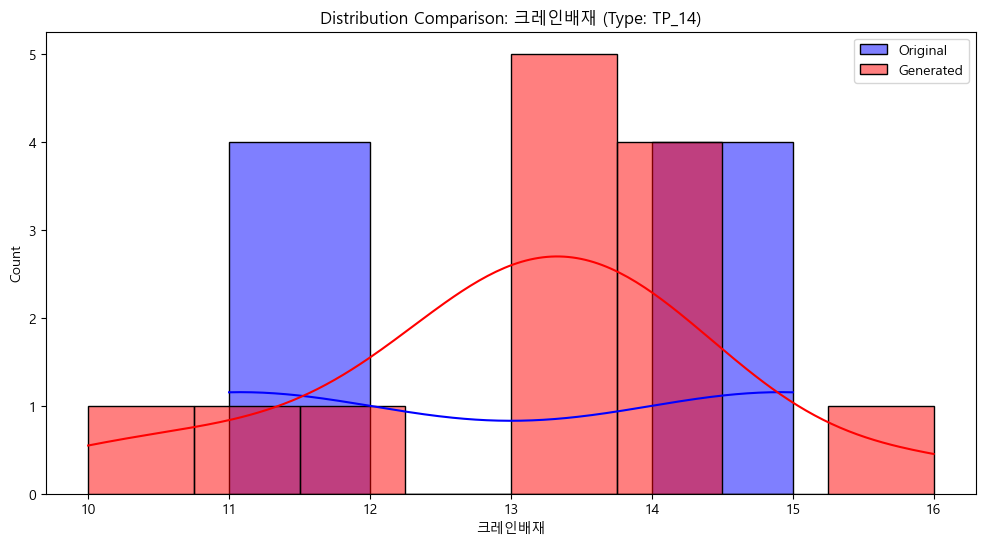

KS Test for 크레인배재 (Type: TP_14): statistic=0.4231, p-value=0.2466


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


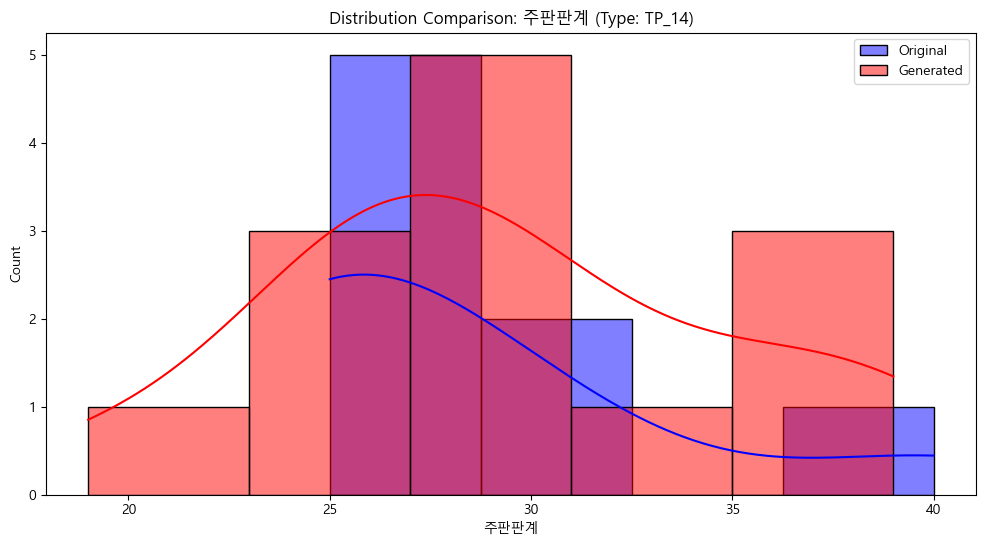

c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KS Test for 주판판계 (Type: TP_14): statistic=0.3173, p-value=0.5729


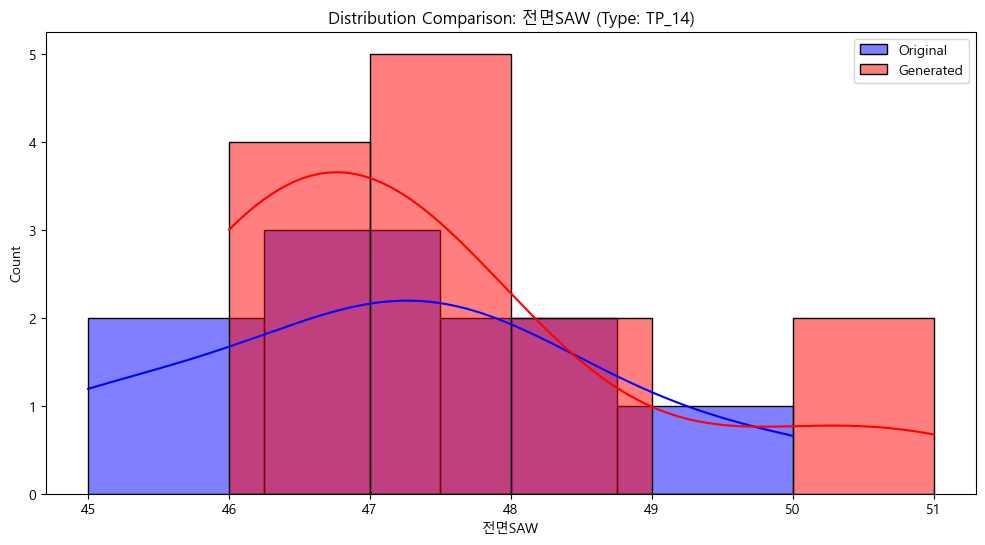

KS Test for 전면SAW (Type: TP_14): statistic=0.2500, p-value=0.8318


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


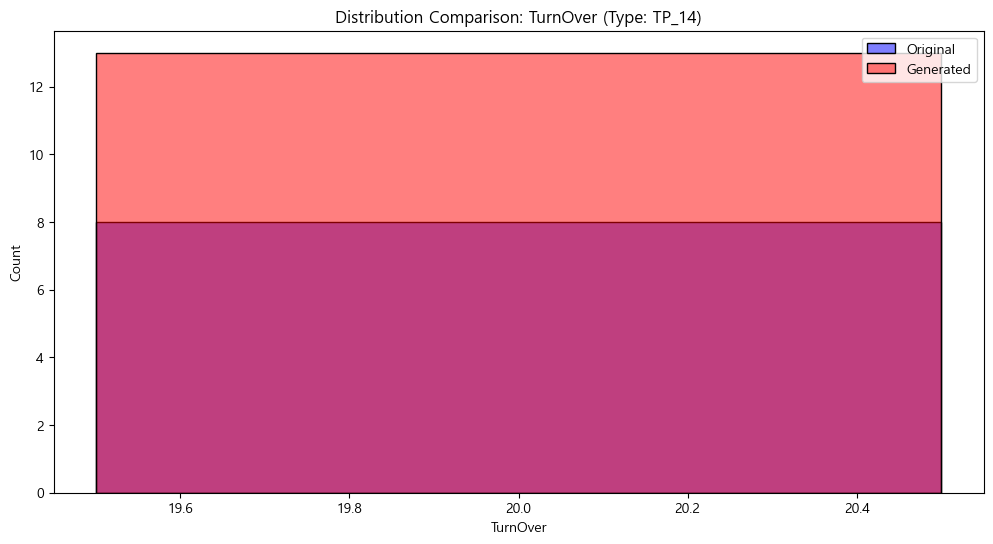

KS Test for TurnOver (Type: TP_14): statistic=0.0000, p-value=1.0000


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


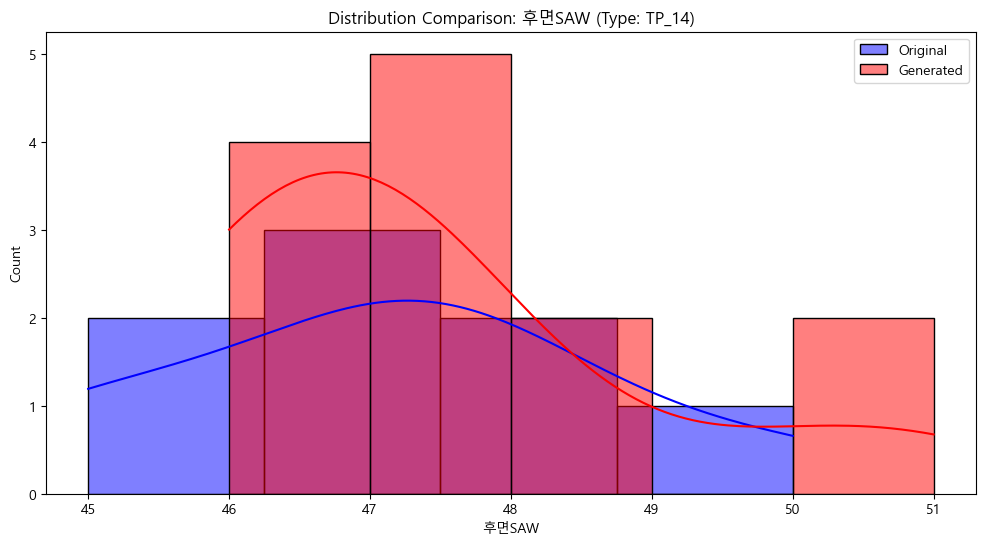

KS Test for 후면SAW (Type: TP_14): statistic=0.2500, p-value=0.8318


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


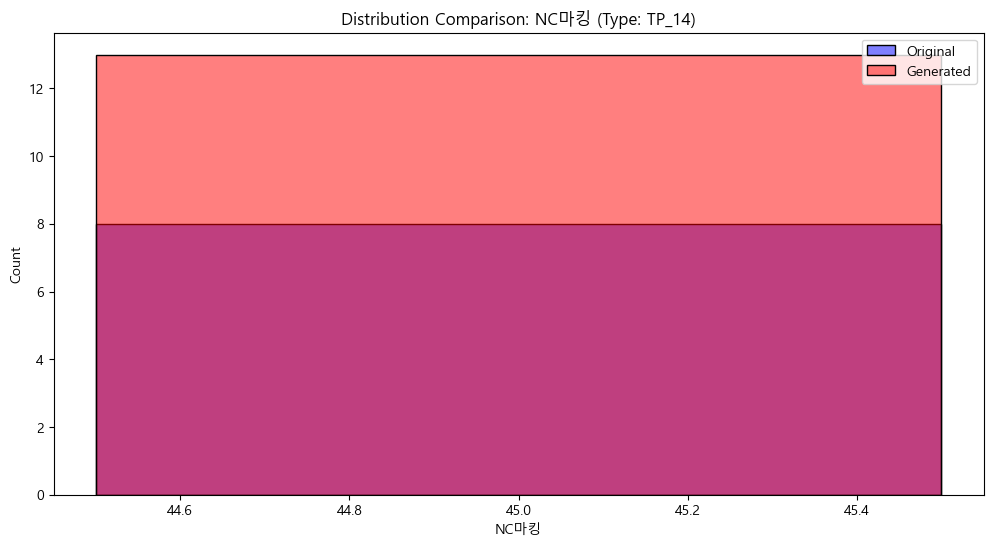

KS Test for NC마킹 (Type: TP_14): statistic=0.0000, p-value=1.0000


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


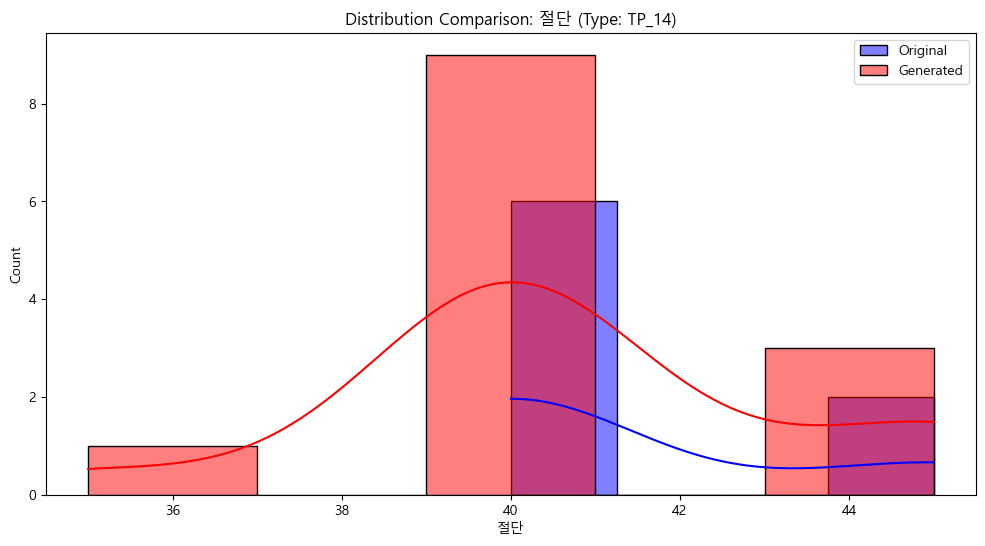

KS Test for 절단 (Type: TP_14): statistic=0.0769, p-value=1.0000


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


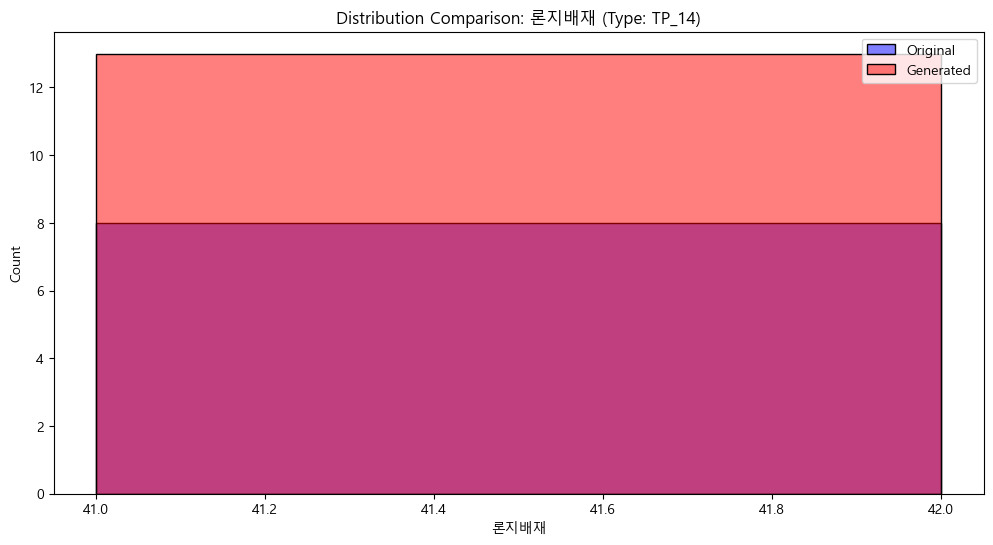

KS Test for 론지배재 (Type: TP_14): statistic=0.0000, p-value=1.0000


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


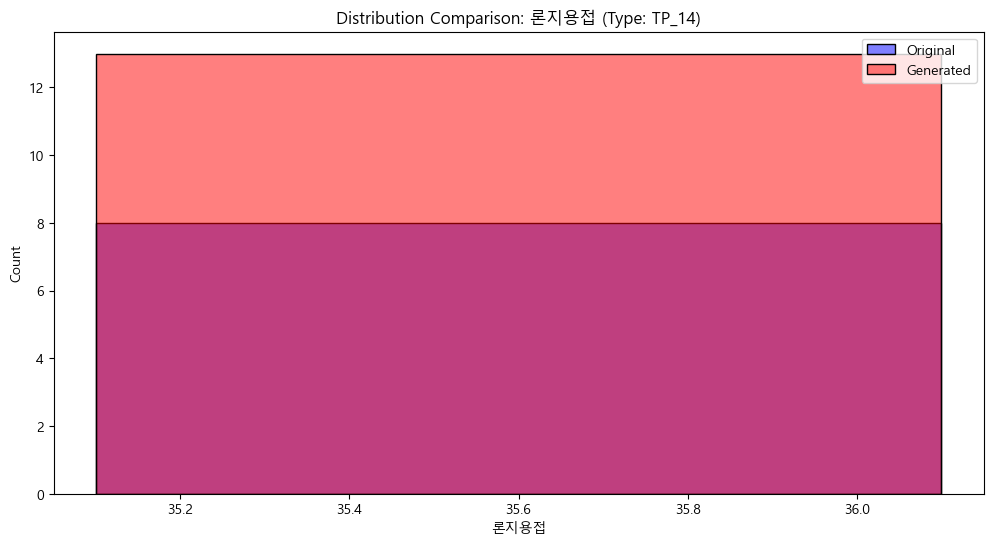

KS Test for 론지용접 (Type: TP_14): statistic=1.0000, p-value=0.0000


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


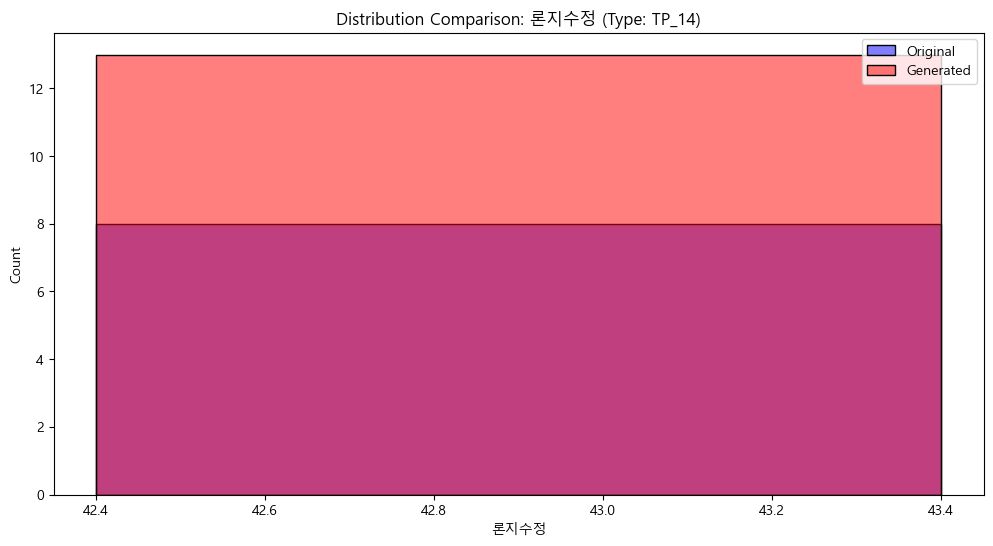

KS Test for 론지수정 (Type: TP_14): statistic=1.0000, p-value=0.0000


c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce

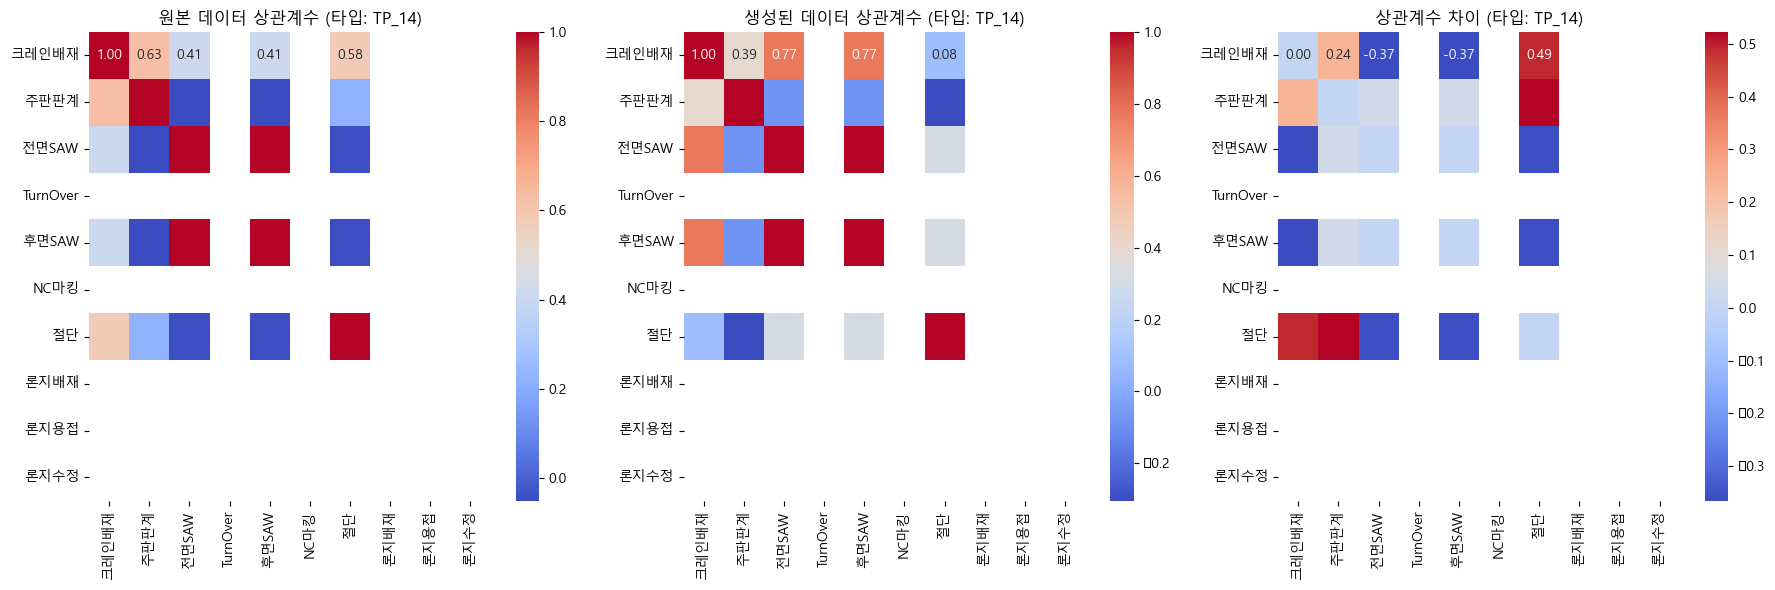


Data count comparison for TP_14:
Original: 8
Generated: 13


In [90]:
# TP_10에 대해서만 분석
type_name = 'TP_14'
print(f"\nAnalyzing Type: {type_name}")

# 분포 비교
for column in original_data.columns:
    if column != '타입' and original_data[column].dtype in ['int64', 'float64']:
        compare_distributions_by_type(original_data, generated_data, column, type_name)

# 상관관계 비교
compare_correlations_by_type(original_data, generated_data, type_name)

# TP_10 데이터 개수 비교
orig_count = len(original_data[original_data['타입'] == type_name])
gen_count = len(generated_data[generated_data['타입'] == type_name])
print(f"\nData count comparison for {type_name}:")
print(f"Original: {orig_count}")
print(f"Generated: {gen_count}")

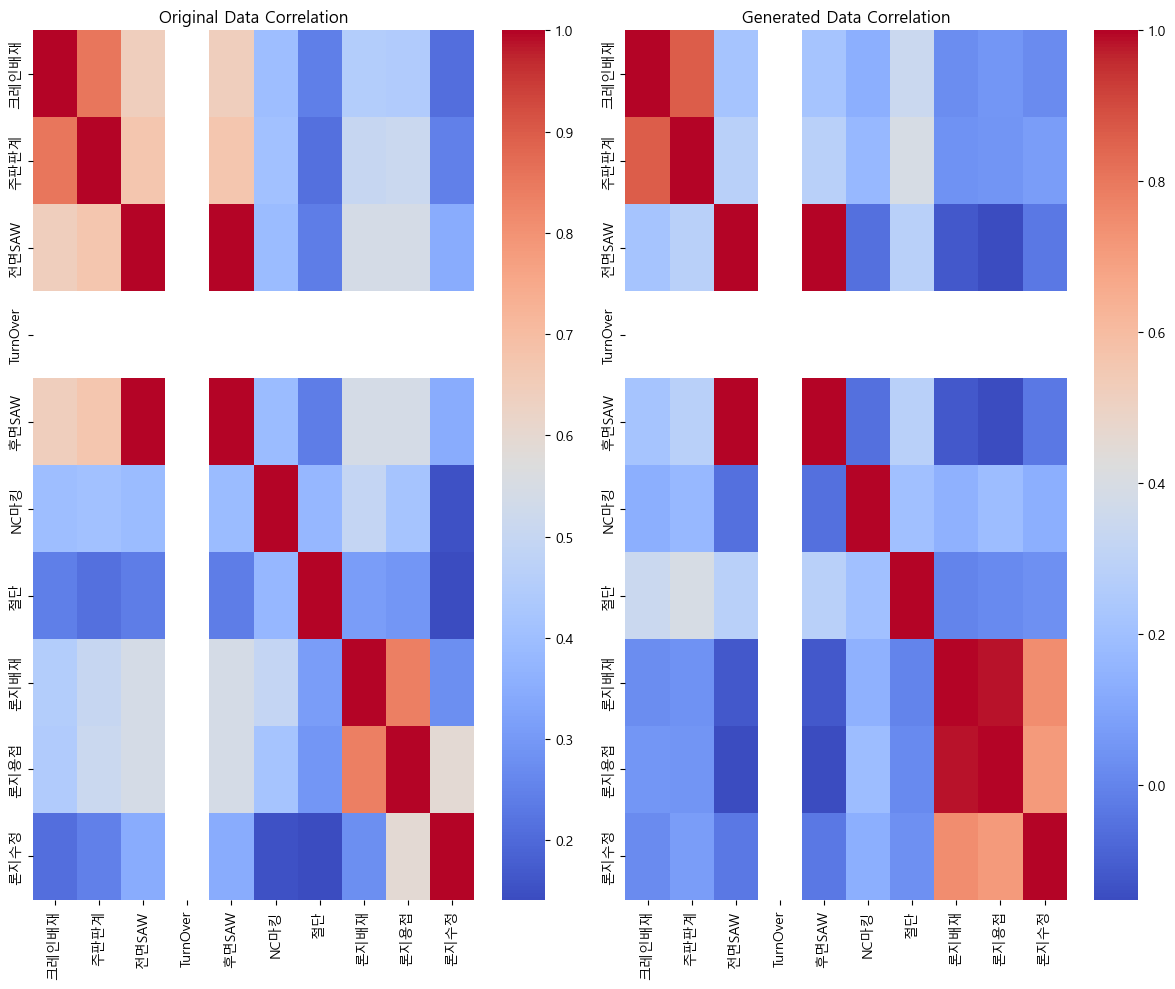

c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\ohj\anaconda3\envs\simenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


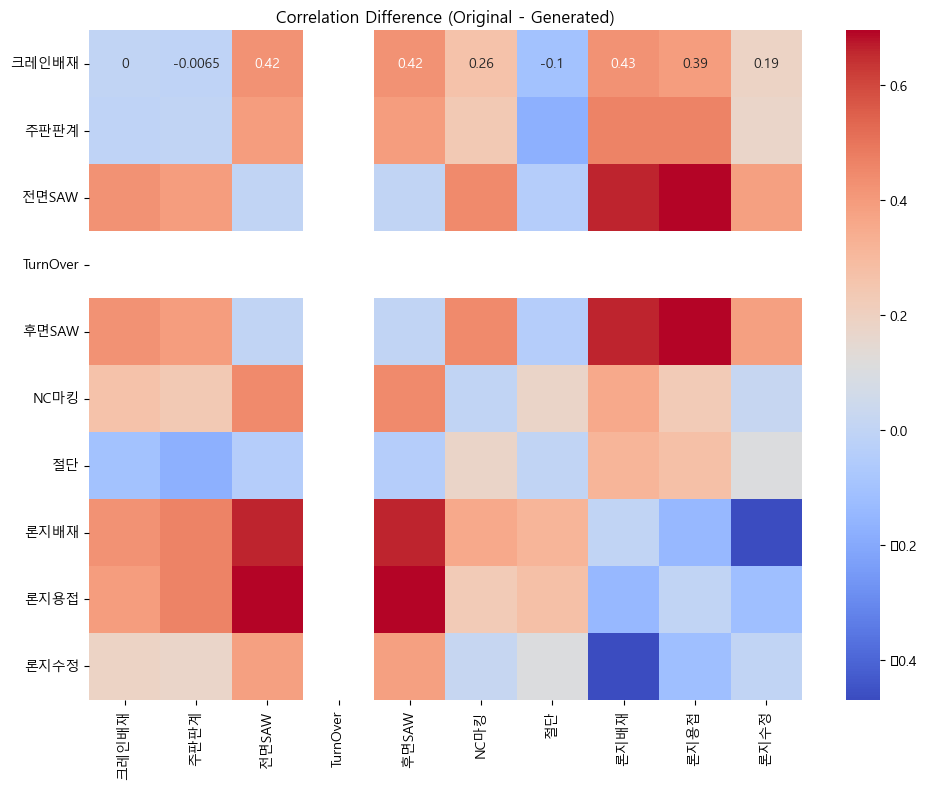

In [73]:
def compare_correlations(original, generated):
    original_corr = original.select_dtypes(include=[np.number]).corr()
    generated_corr = generated.select_dtypes(include=[np.number]).corr()
    
    plt.figure(figsize=(12, 10))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(original_corr, annot=False, cmap='coolwarm')
    plt.title('Original Data Correlation')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(generated_corr, annot=False, cmap='coolwarm')
    plt.title('Generated Data Correlation')
    
    plt.tight_layout()
    plt.show()
    
    # 상관관계 차이
    diff_corr = original_corr - generated_corr
    plt.figure(figsize=(10, 8))
    sns.heatmap(diff_corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Difference (Original - Generated)')
    plt.tight_layout()
    plt.show()

compare_correlations(original_data, generated_data)